In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datatime для работы с датами
import datetime
from datetime import datetime, date

# задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)     # задаем вывод в виде текста, а не HTML
pd.set_option('display.max_columns', 8)                # устанавливаем отображение максимального количества стобцов
pd.set_option('display.max_rows', 10)                  # устанавливаем отображение максимального количества строк
pd.set_option('display.width', 80)                     # устанавливаеv максимальную ширину отображения в символах

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt 
%matplotlib inline

# задаем стартовое значение для генератора случайных чисел
seedval = 111111

__СОЗДАНИЕ ГРАФИКОВ ВРЕМЕННЫХ РЯДОВ__

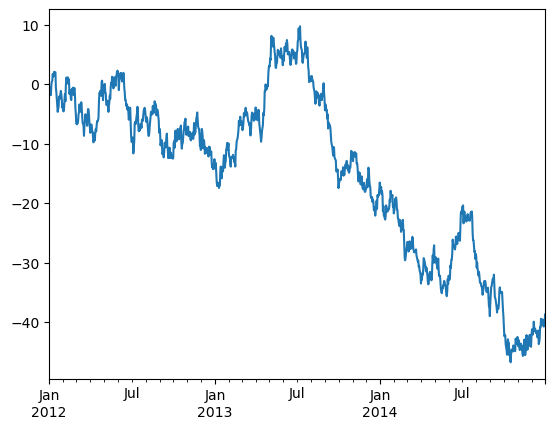

In [2]:
# визуализация с помощью метода .plot()
# генерируем временной ряд на основе случайного блуждания
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index = pd.date_range('2012-01-01', '2014-12-31'))
walks_ts = s.cumsum()
walks_ts.plot();

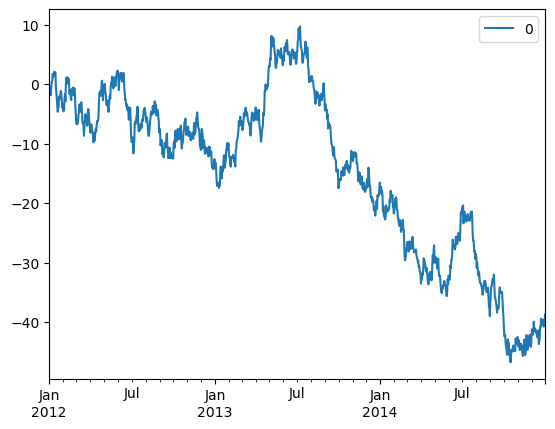

In [3]:
# визуализация объекта DataFrame с одним столбцом даст аналогичный результат с добавлением легенды
walk_df = pd.DataFrame(walks_ts)
walk_df.plot();

In [4]:
# если объект DataFrame состоит из нескольких столбцов, метод .plot() добавит несколько элементов в легенду и подберет
# для каждой линии свой цвет
# сгенерируем два случайных блуждания, которые станут двумя столбцами DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2),
                  index = walks_ts.index,
                  columns = list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

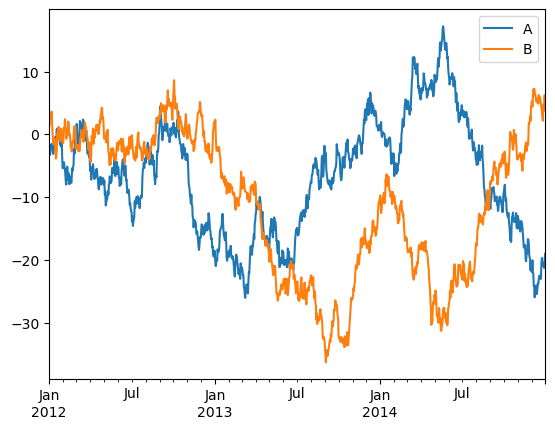

In [5]:
walk_df.plot();

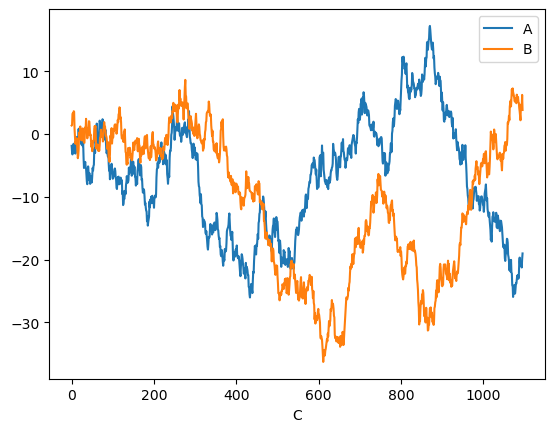

In [6]:
# если необходимо в качестве меток оси x использовать значения столбца DataFrame (вместо индексных меток) используйте 
# параметр x который позволяет задать имя столбца, представляющего метки.
# создаем копию случайного блуждания
df2 = walk_df.copy()
# добавляем столбец С который принимает значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index = df2.index)
# в качестве меток оси Х получаем значения столбца С
df2.plot(x = 'C', y = ['A', 'B']);

__Настройка внешнего вида графика временного ряда__

Добавление заголовка и изменение подписей осей

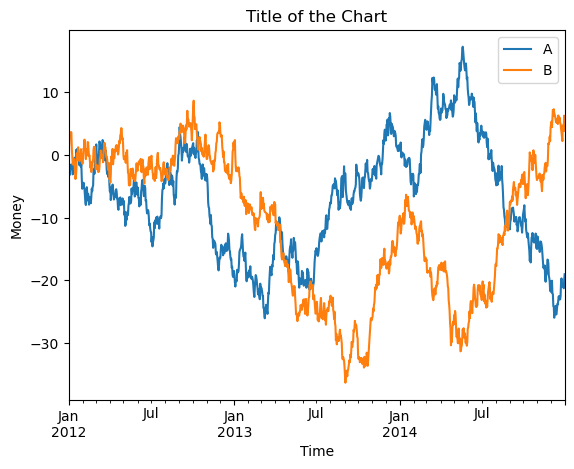

In [7]:
# создаем график временного ряда с заголовками и заданными подписями осей х и у
# заголовок создаем с помощью параметра title метода .plot()
walk_df.plot(title = 'Title of the Chart')
# после вызова метода .plot() явно задаем подписи осей х и у
plt.xlabel('Time')
plt.ylabel('Money');

Настройка содержимого легенды

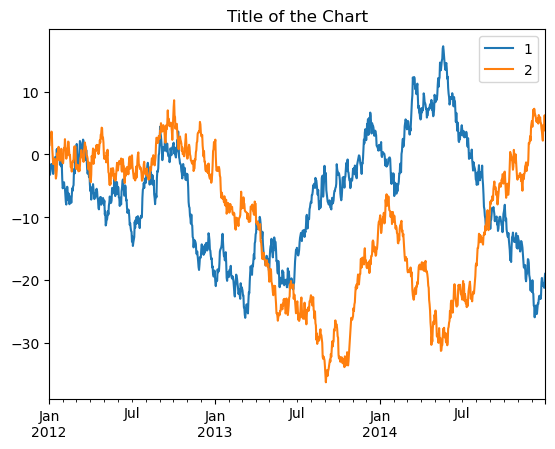

In [8]:
# изменяем элементы легенды, соответствующие именам столбцов датафрейма
ax = walk_df.plot(title = "Title of the Chart")
# эта строка задает метки легенды
ax.legend(['1', '2']);

In [9]:
# месторасположение легенды можно задать с помощью параметра loc метода .legend() По умолчанию библиотека pandas 
# задает местоположение 'best'

- __best__          код 0  - наилучшее расположение с учетом исследования графика
- __upper right__   код 1  - расположение в верхнем правом углу
- __upper left__    код 2  - расположение в верхнем левом углу
- __lower left__    код 3  - расположение в нижнем левом углу
- __lower right__   код 4  - расположение в нижнем правом углу
- __right__         код 5  - горизонтальное выравнивание справа с вертикальным выравниваем по центру
- __center left__   код 6  - вертикальное выравнивание по центру с горизонтальным выравниванием слева
- __center right__  код 7  - вертикальное выравнивание по центру с горизонтальным выравниванием справа
- __lower center__  код 8  - вертикальное выравнивание снизу с горизональным выравниваем по центру
- __upper center__  код 9  - вертикальное выравнивание сверху с горизональным выравниваем по центру
- __center__        код 10 - вертикальное выравнивание по центру с горизональным выравниваем по центру

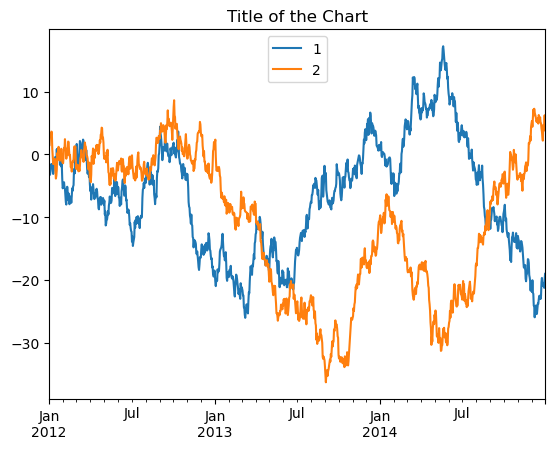

In [10]:
ax = walk_df.plot(title = "Title of the Chart")
ax.legend(['1', '2'], loc = 9);

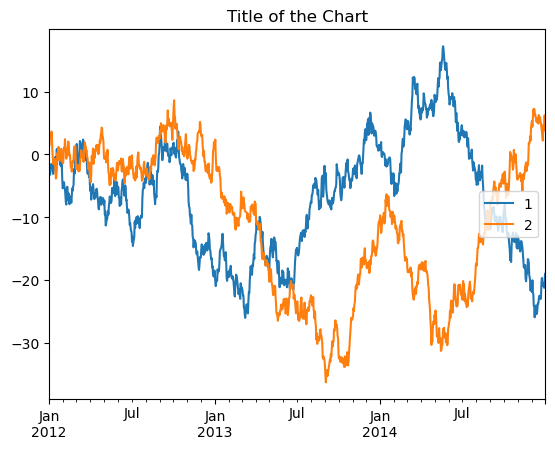

In [11]:
ax = walk_df.plot(title = "Title of the Chart")
ax.legend(['1', '2'], loc = 'right');

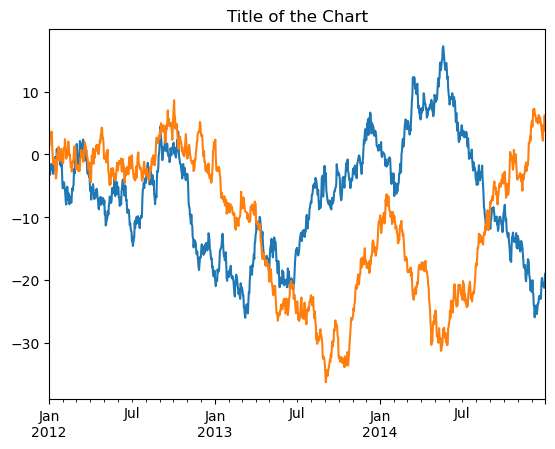

In [13]:
# Вывод легенды можно отключить с помощью параметра legend = False
walk_df.plot(title = "Title of the Chart", legend = False);

__Настройка цветов, стилей и маркеров линий__

Чтобы задать свои собственные цвета необходимо передать кодовые обозначения цветов параметру style функции plot
- __b__: синий
- __g__: зеленый 
- __r__: красный
- __c__: голубой
- __m__: пурпурный 
- __y__: желтый
- __k__: черный
- __w__: белый

Кроме того можно задать цвет с помощью шестнадцатеричного RGB кода в формате #RRGGBB

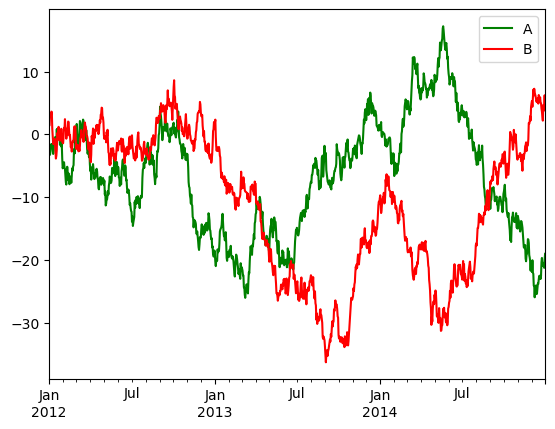

In [14]:
# меняем цвета линий графика, используя символьный код для первой линии и шестнадцатеричный RGB для второй
walk_df.plot(style = ['g', '#FF0000']);

Стили линий можно задать с помощью кодов стиля линий
- __'-'__ = сплошная линия
- __'--'__ = пунктирная линия
- __':'__ = точечная линая
- __'-.'__ = точечно пунктирная
- __'.'__ = точки 

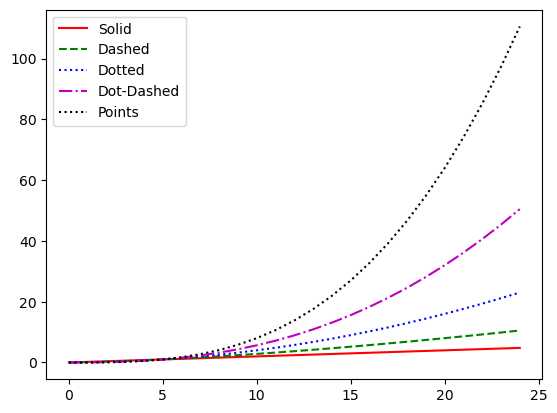

In [15]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-Dashed', 'Points']
line_style = pd.DataFrame({0: t,
                           1: t**1.5,
                           2: t**2.0,
                           3: t**2.5,
                           4: t**3.0})
# создаем график задав цвет и стиль каждой линии
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k:'])
# задаем легенду
ax.legend(legend_labels, loc = 'upper left');

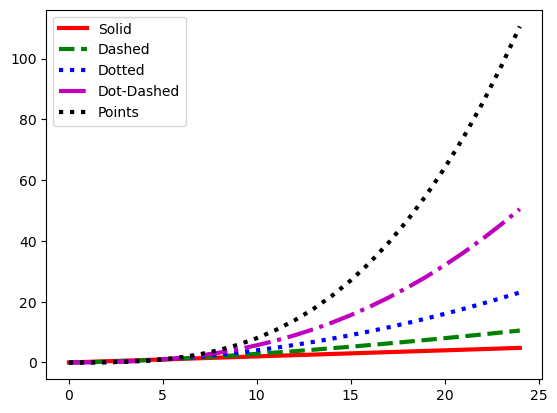

In [16]:
# толщину лини можно задать с помощью параметра lw
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k:'], lw = 3)
ax.legend(legend_labels, loc = 'upper left');

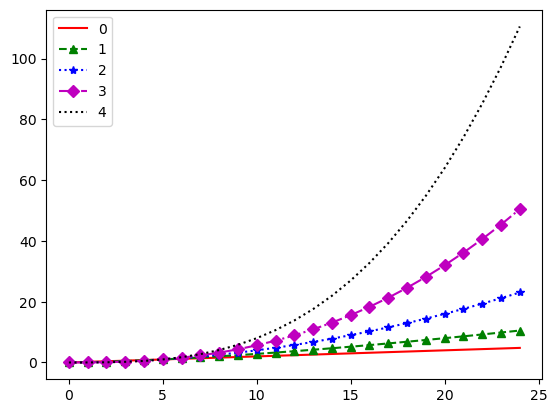

In [20]:
# маркеры линий можно указать с помощью специальных обозначений в програмном коде
x = line_style.plot(style = ['r-', 'g--^', 'b:*', 'm-.D', 'k:'])
ax.legend(legend_labels, loc = 'upper left');

__Настройка диапазона делений и меток делений шкалы__

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

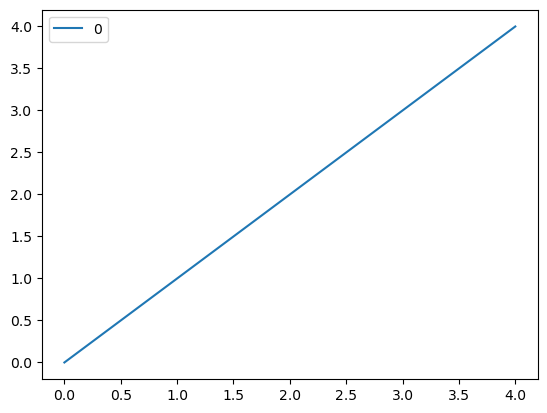

In [21]:
# значения которые библиотека pandas будет использовать в качестве меток делений можно найти с помощью функции 
# plt.xticks() эта функция возвращает два значения: значения для каждого деления и объекты представляющие фактические
# метки делений
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks